In [16]:
import sys
from pathlib import Path
from os import getcwd
sys.path.append(str(Path(getcwd()).parent))

from datetime import date, timedelta
import codecs
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

from os.path import join

from bulletin import default_input, default_output
from bulletin.services.metabase import Metabase
from bulletin.systems.casos_confirmados import CasosConfirmados
from bulletin.systems.notifica import Notifica
from bulletin.utils.static import Municipios
from bulletin.utils.normalize import normalize_hash, normalize_labels, normalize_text, date_hash, normalize_number
from bulletin.utils import static
from bulletin.utils.xls_ import fit_cols

from datetime import datetime


today = datetime.today()
ontem = today - timedelta(1)
anteontem = ontem - timedelta(1)

In [2]:
municipios = Municipios()
municipios['mun_resid'] = municipios['municipio'].apply(normalize_text)
municipios.loc[municipios['uf']!='PR','mun_resid'] = municipios.loc[municipios['uf']!='PR','municipio'].apply(normalize_text) + '/' + municipios['uf']

In [3]:
mb = Metabase()

limit: 100000
Cookie:'c5d88********-****-****-****-************05b77'

sql_files:
	0: diario
	1: old_diario
	2: new_query
	3: all_notifica
	4: coisa
	5: usecols_notifica
	6: query_linda

sql_results:
	0: query_linda_len
	1: coisa_len_202106081128
	2: usecols_notifica_len_202106042312
	3: all_notifica_len_202106041103
	4: all_notifica


In [4]:
mb.generate_notifica_query('query_linda')

Select 44 columns


"SELECT id, to_char(data_notificacao,'DD/MM/YYYY') AS data_notificacao, to_char(data_encerramento,'DD/MM/YYYY') AS data_encerramento, status_notificacao, origem, to_char(updated_at,'DD/MM/YYYY') AS updated_at, numero_do, classificacao_final, criterio_classificacao, evolucao, to_char(data_cura_obito,'DD/MM/YYYY') AS data_cura_obito, tipo_paciente, cns, cpf, passaporte, etnia, paciente, sexo, to_char(data_nascimento,'DD/MM/YYYY') AS data_nascimento, nome_mae, raca_cor, ocupacao, ocupacao_descricao, cod_cbo, escolaridade, pais_residencia, pais_municipio_residencia, uf_residencia, ibge_residencia, cep_residencia, logradouro_residencia, bairro_residencia, uf_unidade_notifica, ibge_unidade_notifica, to_char(data_cadastro,'DD/MM/YYYY') AS data_cadastro, to_char(data_coleta,'DD/MM/YYYY') AS data_coleta, to_char(data_recebimento,'DD/MM/YYYY') AS data_recebimento, to_char(data_liberacao,'DD/MM/YYYY') AS data_liberacao, requisicao, resultado, exame, metodo, lab_executor, to_char(data_1o_sintomas,

In [5]:
mb.list_sql_files()


sql_files:
	0: diario
	1: old_diario
	2: new_query
	3: all_notifica
	4: coisa
	5: usecols_notifica
	6: query_linda


In [6]:
# notifica = mb.download_notificacao('query_linda')
notifica = Notifica()
notifica.load()

In [7]:
notifica.save()

In [8]:
casosn = notifica.df
casosn

,id,data_notificacao,data_encerramento,status_notificacao,origem,updated_at,numero_do,classificacao_final,criterio_classificacao,evolucao,data_cura_obito,tipo_paciente,cns,cpf,passaporte,etnia,paciente,sexo,data_nascimento,nome_mae,raca_cor,ocupacao,ocupacao_descricao,cod_cbo,escolaridade,pais_residencia,pais_municipio_residencia,uf_residencia,ibge_residencia,cep_residencia,logradouro_residencia,bairro_residencia,uf_unidade_notifica,ibge_unidade_notifica,data_cadastro,data_coleta,data_recebimento,data_liberacao,requisicao,resultado,exame,metodo,lab_executor,data_1o_sintomas,data_diagnostico,idade,hash,hash_atend,hash_less,hash_more,hash_mae,hash_nasc
0,66722,2020-04-13,2020-07-30,2.0,1.0,2020-08-19,None,2.0,1.0,1.0,2020-07-30,3.0,None,None,NaN,0.0,NILDA CASTORINA CORREIA CRUZ,2.0,1973-06-20,APARECIDA CORREIA DOS SANTOS,1.0,5.0,Atendente de panificadora de um supermercado,NaN,NaN,1.0,,41,412710,84267190,Rua Jaguatirica,Parque Limeira Área II,41,412710,2020-04-20,2020-04-13,2020-04-20,2020-04-20,202121000002,9.0,1,1,LAFFER,2020-03-30,2020-04-13,46,NILDACASTORINACORREIACRUZ46412710,NILDACASTORINACORREIACRUZ46412710,NILDACASTORINACORREIACRUZ45412710,NILDACASTORINACORREIACRUZ47412710,NILDACASTORINACORREIACRUZAPARECIDACORREIADOSSA...,NILDACASTORINACORREIACRUZ20061973
1,66776,2020-04-12,2020-05-02,2.0,1.0,2020-06-18,None,2.0,1.0,1.0,2020-05-02,3.0,None,02965400990,NaN,0.0,ELIANA DA SILVA,2.0,1977-03-08,MARIA DAS GRAÇAS DE SOUZA,4.0,5.0,SETOR DE ABATEDOURO DESOSSA GTFOODS,NaN,NaN,1.0,,41,411810,87660000,RUA COLOMBIA,CENTRO,41,411810,2020-04-16,2020-04-16,2020-04-17,2020-04-19,201502005722,9.0,1,1,LABORATORIO CENTRAL DO ESTADO,NaT,2020-04-16,43,ELIANADASILVA43411810,ELIANADASILVA43411810,ELIANADASILVA42411810,ELIANADASILVA44411810,ELIANADASILVAMARIADASGRAASDESOUZA,ELIANADASILVA08031977
2,66777,2020-04-14,2021-03-23,2.0,1.0,2021-03-23,None,2.0,1.0,1.0,2020-12-16,3.0,None,01890364940,NaN,NaN,SALETE LOURDES REBESCHINI DA SILVA,2.0,1952-06-24,NATALINA REBESCHINI,1.0,5.0,APOSENTADA,NaN,NaN,1.0,,41,412860,85585000,LINHA PILONETO,INTERIOR,41,412860,NaT,2020-12-14,NaT,NaT,-1,9.0,1,1,,2020-12-01,2020-12-14,67,SALETELOURDESREBESCHINIDASILVA67412860,SALETELOURDESREBESCHINIDASILVA67412860,SALETELOURDESREBESCHINIDASILVA66412860,SALETELOURDESREBESCHINIDASILVA68412860,SALETELOURDESREBESCHINIDASILVANATALINAREBESCHINI,SALETELOURDESREBESCHINIDASILVA24061952
3,66824,2020-04-13,2020-04-26,2.0,1.0,2020-08-18,None,2.0,2.0,1.0,2020-04-26,3.0,702601272873442,05559202916,NaN,0.0,MARCIANO PEREIRA LUCAS,1.0,1985-07-04,LUIZA APARECIDA APARECIDA PEREIRA LUCAS,4.0,5.0,COLETOR DE OVOS,NaN,NaN,1.0,,41,410510,86630000,QUADRA 3 LOTE 17,JARDIM NAZARÉ,41,410510,NaT,NaT,NaT,NaT,-1,0.0,-1,3,,2020-04-12,2020-04-13,34,MARCIANOPEREIRALUCAS34410510,MARCIANOPEREIRALUCAS34410510,MARCIANOPEREIRALUCAS33410510,MARCIANOPEREIRALUCAS35410510,MARCIANOPEREIRALUCASLUIZAAPARECIDAAPARECIDAPER...,MARCIANOPEREIRALUCAS04071985
4,66864,2020-04-13,2020-04-29,2.0,1.0,2021-01-29,None,2.0,2.0,3.0,NaT,3.0,None,06465406969,NaN,0.0,VALDOMIRA DA SILVA CORDEIRO,2.0,1935-10-05,DURVINA MARIA DA SILVA,99.0,0.0,Não Informado,0.0,NaN,1.0,,41,412625,NaN,NaN,NaN,41,412625,NaT,NaT,NaT,NaT,-1,0.0,-1,3,,2020-04-03,2020-04-13,84,VALDOMIRADASILVACORDEIRO84412625,VALDOMIRADASILVACORDEIRO84412625,VALDOMIRADASILVACORDEIRO83412625,VALDOMIRADASILVACORDEIRO85412625,VALDOMIRADASILVACORDEIRODURVINAMARIADASILVA,VALDOMIRADASILVACORDEIRO05101935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70487,4240318,2021-06-14,NaT,1.0,1.0,2021-06-14,None,2.0,1.0,3.0,NaT,3.0,704803528170441,10752663941,NaN,NaN,ANA PAULA GIMENES MAGALHAES,2.0,1996-07-14,APARECIDA GIMENES MAGALHAES,99.0,5.0,BANHISTA,NaN,NaN,1.0,,41,412550,83060386,Rua Mário Tomelim,Guatupê,41,412550,2021-06-14,2021-06-14,NaT,NaT,-1,12.0,167,2,,2021-06-08,2021-06-14,24,ANAPAULAGIMENESMAGALHAES24412550,ANAPAULAG

<AxesSubplot:xlabel='faixa_etaria'>

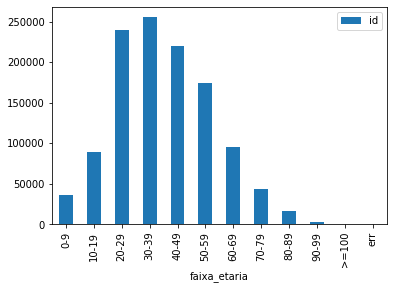

In [22]:
faixa_etaria = [0,10,20,30,40,50,60,70,80,90,100]
faixa_etaria_labels = ['err','0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99','>=100']
casosn['faixa_etaria'] = [ faixa_etaria_labels[idx] for idx in np.digitize(casosn['idade'],faixa_etaria,right=False)]
casosn.groupby('faixa_etaria')[['id']].count().plot(kind='bar')

In [9]:
schema = notifica.schema

,id,group_id,group_name,column,usecols,sivep,dtypes,converters,constraint_name,foreign_table_name,foreign_column_name,ref
0,1,0,notificacao,id,1,1,int,NaN,NaN,NaN,NaN,NaN
1,2,0,notificacao,data_notificacao,1,1,datetime,"lambda x: isvaliddate(pd.to_datetime(x,format=...",NaN,NaN,NaN,NaN
2,3,0,notificacao,data_encerramento,1,1,datetime,"lambda x: isvaliddate(pd.to_datetime(x,format=...",NaN,NaN,NaN,NaN
3,4,0,notificacao,status_notificacao,1,0,float,NaN,status,status,id,[ref: - status.id]
4,5,0,notificacao,origem,1,0,float,NaN,origem,origem,id,[ref: - origem.id]
5,6,0,notificacao,updated_at,1,0,datetime,"lambda x: isvaliddate(pd.to_datetime(x,format=...",NaN,NaN,NaN,NaN
6,7,0,notificacao,numero_do,1,1,str,normalize_do,NaN,NaN,NaN,NaN
7,8,0,notificacao,classificacao_final,1,1,float,NaN,classificacao_final,classificacao_final,id,[ref: - classificacao_final.id]
8,9,0,notificacao,criterio_classificacao,1,1,float,NaN,criterio_classificacao,criterio_classificacao,id,[ref: - criterio_classificacao.id]
9,10,0,notificacao,evolucao,1,1,float,NaN,evolucao,evolucao,id,[ref: - evolucao.id]


In [14]:
for group in schema['group_name'].unique():
    print(f"\n------{group}-------")
    for col in schema.loc[schema['group_name']==group,'column']:
        print(f"{col} -> {casosn[col].isna().sum()}")


------notificacao-------
id -> 0
data_notificacao -> 48
data_encerramento -> 328627
status_notificacao -> 0
origem -> 0
updated_at -> 23142
numero_do -> 1148017
classificacao_final -> 0
criterio_classificacao -> 0
evolucao -> 111431
data_cura_obito -> 460454

------identificacao-------
tipo_paciente -> 19
etnia -> 720729
sexo -> 0
raca_cor -> 3711
ocupacao -> 593324
ocupacao_descricao -> 5613
cod_cbo -> 695909
escolaridade -> 1097148

------tb_pacientes-------
cns -> 103011
cpf -> 161808
passaporte -> 1169615
paciente -> 0
data_nascimento -> 54
nome_mae -> 1962

------localizacao-------
pais_residencia -> 0
pais_municipio_residencia -> 16
uf_residencia -> 0
ibge_residencia -> 0
cep_residencia -> 372893
logradouro_residencia -> 129359
bairro_residencia -> 240047

------atendimento-------
uf_unidade_notifica -> 0
ibge_unidade_notifica -> 0

------laboratorial-------
data_cadastro -> 291449
data_coleta -> 122951
data_recebimento -> 408212
data_liberacao -> 341127
requisicao -> 0
resultad

In [ ]:
cc = CasosConfirmados()
cc.load(f"cc_{today.strftime('%d_%m_%Y')}")
casosct = cc.df
casosct.tail()

In [ ]:
novos_casos = casos_notifica.loc[~(
    (casos_notifica['hash'].isin(casosct['hash'])) |
    (casos_notifica['hash'].isin(casosct['hash_less'])) |
    (casos_notifica['hash'].isin(casosct['hash_more'])
)].copy()

novos_casos['data_com'] = pd.to_datetime(date.today()).strftime('%d/%m/%Y')
novos_casos = novos_casos.sort_values('paciente')
novos_casos

In [ ]:
novos_casos_errados = novos_casos.loc[(
    (novos_casos['data_liberacao'] <= pd.to_datetime('2020-03-01')) |
    (novos_casos['data_liberacao'] > pd.to_datetime(date.today()))
)]

novos_casos = novos_casos.loc[~(
    (novos_casos['data_liberacao'] <= pd.to_datetime('2020-03-01')) |
    (novos_casos['data_liberacao'] > pd.to_datetime(date.today()))
)]

novos_casos[['id','paciente','sexo','idade','mun_resid', 'mun_atend', 'rs', 'exame','data_liberacao','data_com','data_1o_sintomas','hash']].to_excel(join(default_output,'novos_casos.xlsx'))

novos_casos_errados

In [ ]:
obitos_notifica = notifica.loc[notifica['evolucao']==2]
obitos_casos = casosct.loc[casosct['evolucao']==2]

novos_obitos = obitos_notifica.loc[~(
    (obitos_notifica['hash'].isin(obitos_casos['hash'])) |
    (obitos_notifica['hash'].isin(obitos_casos['hash_less'])) |
    (obitos_notifica['hash'].isin(obitos_casos['hash_more'])) |
    (obitos_notifica['hash_diag'].isin(obitos_casos['hash_diag'])) 
)]

novos_obitos = novos_obitos.loc[novos_obitos['data_cura_obito'].notna()]
novos_obitos = novos_obitos.loc[novos_obitos['hash'].isin(casosct['hash'].tolist() + novos_casos['hash'].tolist())]
novos_obitos = novos_obitos.sort_values('paciente')
novos_obitos

In [ ]:
novos_obitos_errados = novos_obitos.loc[(
    (novos_obitos['data_cura_obito'] <= pd.to_datetime('2020-03-01')) |
    (novos_obitos['data_cura_obito'] > pd.to_datetime(date.today()))
)]

novos_obitos = novos_obitos.loc[~(
    (novos_obitos['data_cura_obito'] <= pd.to_datetime('2020-03-01')) |
    (novos_obitos['data_cura_obito'] > pd.to_datetime(date.today()))
)]

novos_obitos[['id','paciente','sexo','idade','mun_resid', 'rs', 'data_cura_obito','hash']].to_excel(join(default_output,'novos_obitos.xlsx'))

novos_obitos_errados

In [ ]:
stop

In [ ]:
casos_confirmados = pd.merge(casosct.rename(columns={'ibge_resid':'ibge'}),municipios[['ibge','rs']],how='left',on='ibge')

casos_confirmadosPR = casos_confirmados.loc[casos_confirmados['rs']!=99]

obitos_confirmados =  casos_confirmados.loc[casos_confirmados['evolucao']==2]

obitos_confirmadosPR = obitos_confirmados.loc[obitos_confirmados['rs']!=99]

print(f"Total de casos: {len(casos_confirmados)} + {len(novos_casos)}")
print(f"Total de obitos: {len(obitos_confirmados)} + {len(novos_obitos)}\n\n")

novos_casosPR = novos_casos.loc[novos_casos['rs']!=99].copy()
print(f"Total de casos PR: {len(casos_confirmadosPR)} + {len(novos_casosPR)}")

novos_obitosPR = novos_obitos.loc[novos_obitos['rs']!=99].copy()
print(f"Total de obitos PR: {len(obitos_confirmadosPR)} + {len(novos_obitosPR)}")

novos_casosFora = novos_casos.loc[novos_casos['rs']==99].copy()
print(f"Total de casos Fora: {len(casos_confirmados) - len(casos_confirmadosPR)} + {len(novos_casosFora)}")

novos_obitosFora = novos_obitos.loc[novos_obitos['rs']==99].copy()
print(f"Total de obitos Fora: {len(obitos_confirmados) - len(obitos_confirmadosPR)} + {len(novos_obitosFora)}")


novos_obitosPR_group = novos_obitosPR.groupby(by='municipio')

data_retroativos = ontem - timedelta(14)

retroativos = novos_casosPR.loc[(novos_casosPR['data_liberacao'].apply(date_parser) <= data_retroativos)].sort_values(by='data_liberacao')
last2weeks = novos_casosPR.loc[(novos_casosPR['data_liberacao'].apply(date_parser) > data_retroativos) & (novos_casosPR['data_liberacao'].apply(date_parser) <= anteontem)].sort_values(by='data_liberacao')
hoje = novos_casosPR.loc[(novos_casosPR['data_liberacao'].apply(date_parser) > anteontem)].sort_values(by='data_liberacao')

obitos_retroativos = novos_obitosPR.loc[(novos_obitosPR['data_cura_obito'].apply(date_parser) <= data_retroativos)].sort_values(by='data_cura_obito')
obitos_last2weeks = novos_obitosPR.loc[(novos_obitosPR['data_cura_obito'].apply(date_parser) > data_retroativos) & (novos_obitosPR['data_cura_obito'].apply(date_parser) <= anteontem)].sort_values(by='data_cura_obito')
obitos_hoje = novos_obitosPR.loc[(novos_obitosPR['data_cura_obito'].apply(date_parser) > anteontem)].sort_values(by='data_cura_obito')

relatorio_file = join(default_output,f"relatorio_{(today.strftime('%d/%m/%Y_%Hh').replace('/','_').replace(' ',''))}.txt")
with codecs.open(relatorio_file,"w","utf-8-sig") as relatorio:
    relatorio.write(f"{today.strftime('%d/%m/%Y')}\n")
    relatorio.write(f"{len(novos_casosPR):,} novos casos residentes ".replace(',','.'))

    if len(novos_casosFora) > 0:
        relatorio.write(f"e {len(novos_casosFora):,} não residente{'s' if len(novos_casosFora) > 1 else ''} ".replace(',','.'))
    relatorio.write(f"divulgados no PR.\n")

    relatorio.write(f"{len(casos_confirmadosPR)+len(novos_casosPR):,} casos confirmados residentes do PR.\n".replace(',','.'))
    relatorio.write(f"{len(casos_confirmados)+len(novos_casos):,} total geral.\n\n".replace(',','.'))
    relatorio.write(f"{len(novos_obitosPR):,} Óbitos residentes do PR:\n".replace(',','.'))

    for municipio, obitos in novos_obitosPR_group:
        relatorio.write(f"{len(obitos):,} {municipio}\n".replace(',','.'))

    if len(novos_obitosFora) > 0:
        relatorio.write('\n')
        relatorio.write(f"{len(novos_obitosFora):,} Óbito{'s' if len(novos_obitosFora) > 1 else ''} não residente{'s' if len(novos_obitosFora) > 1 else ''} do PR.\n".replace(',','.'))

    relatorio.write('\n')
    relatorio.write(f"{len(obitos_confirmadosPR)+len(novos_obitosPR):,} óbitos residentes do PR.\n".replace(',','.'))
    relatorio.write(f"{len(obitos_confirmados)+len(novos_obitos):,} total geral.\n\n".replace(',','.'))

    for _, row in novos_obitos.iterrows():
       relatorio.write(f"{row['sexo']}\t{row['idade']}\t{row['municipio'] if row['rs']!=99 else (row['municipio']+'/'+row['uf'])}\t{str(row['rs']).zfill(2) if row['rs']!=99 else '#N/D'}\t{row['data_cura_obito'].day}/{static.meses[row['data_cura_obito'].month-1]}/{row['data_cura_obito'].year}\n")
    relatorio.write('\n')

    if True:

        #casos
        relatorio.write(f"{len(novos_casosPR):,} novos casos residentes divulgados no PR.\n".replace(',','.'))

        relatorio.write(f"{len(retroativos):,} casos retroativos confirmados no período de {retroativos.iloc[0]['data_liberacao'].strftime('%d/%m/%Y')} à {retroativos.iloc[-1]['data_liberacao'].strftime('%d/%m/%Y')}.\n".replace(',','.'))
        relatorio.write(f"{len(last2weeks):,} novos casos confirmados no período de {last2weeks.iloc[0]['data_liberacao'].strftime('%d/%m/%Y')} à {last2weeks.iloc[-1]['data_liberacao'].strftime('%d/%m/%Y')}.\n".replace(',','.'))
        relatorio.write(f"{len(hoje):,} novos casos confirmados hoje.\n\n".replace(',','.'))


        novos_casosPR['month'] = novos_casosPR.apply(lambda x: x['data_liberacao'].month, axis=1)
        novos_casosPR['year'] = novos_casosPR.apply(lambda x: x['data_liberacao'].year, axis=1)
        relatorio.write('Novos casos por meses:\n')
        for group, value in novos_casosPR.groupby(by=['year','month']):
            relatorio.write(f"{static.meses[int(group[1])-1]}\\{group[0]}: {len(value)}\n")
        relatorio.write('\n')

        #obitos
        relatorio.write(f"{len(novos_obitosPR):,} novos obitos residentes divulgados no PR.\n".replace(',','.'))

        relatorio.write(f"{len(obitos_retroativos):,} obitos retroativos ocorridos no período de {obitos_retroativos.iloc[0]['data_cura_obito'].strftime('%d/%m/%Y')} à {obitos_retroativos.iloc[-1]['data_cura_obito'].strftime('%d/%m/%Y')}.\n".replace(',','.'))
        relatorio.write(f"{len(obitos_last2weeks):,} novos obitos ocorridos no período de {obitos_last2weeks.iloc[0]['data_cura_obito'].strftime('%d/%m/%Y')} à {obitos_last2weeks.iloc[-1]['data_cura_obito'].strftime('%d/%m/%Y')}.\n".replace(',','.'))
        relatorio.write(f"{len(obitos_hoje):,} novos obitos ocorridos hoje.\n\n".replace(',','.'))

        relatorio.write('Novos obitos por meses:\n')
        novos_obitosPR['month'] = novos_obitosPR.apply(lambda x: x['data_cura_obito'].month, axis=1)
        novos_obitosPR['year'] = novos_obitosPR.apply(lambda x: x['data_cura_obito'].year, axis=1)
        for group, value in novos_obitosPR.groupby(by=['year','month']):
            relatorio.write(f"{static.meses[int(group[1])-1]}\\{group[0]}: {len(value)}\n")
        relatorio.write('\n')

        relatorio.write('Novos obitos por dia:\n')
        for group, value in novos_obitosPR.groupby(by='data_cura_obito'):
            relatorio.write(f"{group.strftime('%d/%m/%Y')}: {len(value)}\n")

        #-----RELATÓRIO DA COMUNICAÇÃO--------------
        obitos_list = []
        munic = []
        for municipio, obitos in novos_obitosPR_group:
            obito = len(obitos)
            obitos_list.append(obito)
            munic.append(municipio)             

        dicionario = (dict(zip(list(munic),list(obitos_list))))
        #print(dicionario)
        dicionario = sorted(dicionario.items(),key=lambda x: x[1], reverse = True)
        #print(dicionario)


        relatorio.write(f"\nOs pacientes que foram a óbito residiam em: ")
        for municip, obit in dict(dicionario).items():
            if obit != 1:
                relatorio.write(f"{municip} ({obit})")
                relatorio.write(f", ")
        relatorio.write(f".\n")
        relatorio.write(f"A Sesa registra ainda a morte de uma pessoa que residia em cada um dos seguintes municípios:")
        for municip, obit in dict(dicionario).items():
            if obit == 1:
                relatorio.write(f"{municip}")
                relatorio.write(f", ")


In [ ]:
with codecs.open(relatorio_file,"r","utf-8-sig") as relatorio:
    print(relatorio.read())

In [ ]:
while input('bateu?') != 'bateu': pass

In [ ]:
novos_casos = novos_casos.rename(columns={
    'id':'id_notifica',
    'ibge_residencia': 'ibge_resid',
    'ibge_unidade_notifica': 'ibge_atend',
    'paciente':'nome',
    'sexo': 'sexo',
    'idade':'idade',
    'exame': 'laboratorio',
    'data_liberacao':'dt_diag',
    'data_com':'comunicacao',
    'data_1o_sintomas': 'is',
    'evolucao': 'evolucao',
    'data_cura_obito': 'data_evolucao',
    'uf': 'uf_resid'
})

novos_casos = novos_casos[['id_notifica', 'uf_resid', 'ibge_resid', 'ibge_atend', 'nome', 'sexo', 'idade', 'laboratorio', 'dt_diag', 'comunicacao', 'is', 'evolucao', 'data_evolucao']]

novos_casos.loc[novos_casos['evolucao']==5,'evolucao'] = 2
novos_casos.loc[~novos_casos['evolucao'].isin([1,2,3]),'evolucao'] = 3

novos_casos['hash'] = (novos_casos['nome'].apply(normalize_hash) +
                  novos_casos['idade'].astype(str) +
                  novos_casos['ibge_resid'].astype(str) )

novos_casos['hash_less'] = ( novos_casos['nome'].apply(normalize_hash) +
                        novos_casos['idade'].apply(lambda x: str(x - 1)) +
                        novos_casos['ibge_resid'].astype(str) )

novos_casos['hash_more'] = ( novos_casos['nome'].apply(normalize_hash) +
                        novos_casos['idade'].apply(lambda x: str(x + 1)) +
                        novos_casos['ibge_resid'].astype(str) )

novos_casos['identificacao'] = list(range(casosct.iloc[-1,0] + 1,casosct.iloc[-1,0] + 1 + len(novos_casos)))
casosct = casosct.append(novos_casos)
print(len(casosct))
casosct.groupby('evolucao')[['sexo']].count()

In [ ]:
novos_obitos = novos_obitos.rename(columns={
    'id': 'id_notifica',
    'data_cura_obito': 'data_evolucao',
    'paciente':'nome'
})

novos_obitos['hash'] = (novos_obitos['nome'].apply(normalize_hash) +
                          novos_obitos['idade'].astype(str) +
                              novos_obitos['ibge_residencia'].astype(str) )

novos_obitos['data_com_evolucao'] = pd.to_datetime(date.today())
novos_obitos['evolucao'] = 2

novos_obitos = novos_obitos[['hash','id_notifica','evolucao','data_evolucao','data_com_evolucao']]
novos_obitos = novos_obitos.set_index('hash')
casosct = casosct.set_index('hash')
casosct.update(novos_obitos)
casosct.reset_index(inplace=True)
casosct = casosct[['identificacao','id_notifica','uf_resid','ibge_resid','ibge_atend','nome','sexo','idade','laboratorio','dt_diag','comunicacao','is','evolucao','data_evolucao','data_com_evolucao','hash','hash_less','hash_more','hash_diag']]

print(len(casosct))
casosct.groupby('evolucao')[['sexo']].count()

In [ ]:
# casosct['is'] = casosct['is'].apply(lambda x: str(x)[:10] if not str(x).lower() in ['none','nat','nan'] else 'none')
# casosct.loc[casosct['is'].str.contains('/'),'is2'] = casosct.loc[casosct['is'].str.contains('/'),'is'].apply(lambda x: pd.to_datetime(x,format='%d/%m/%Y',errors='raise'))
# casosct.loc[casosct['is'].str.contains('-'),'is2'] = casosct.loc[casosct['is'].str.contains('-'),'is'].apply(lambda x: pd.to_datetime(x,format='%Y-%m-%d',errors='raise'))

# casosct['comunicacao'] = casosct['comunicacao'].apply(str)
# casosct.loc[casosct['comunicacao'].str.contains('/'),'com'] = casosct.loc[casosct['comunicacao'].str.contains('/'),'comunicacao'].apply(lambda x: pd.to_datetime(x,format='%d/%m/%Y',errors='raise'))
# casosct.loc[casosct['comunicacao'].str.contains('-'),'com'] = casosct.loc[casosct['comunicacao'].str.contains('-'),'comunicacao'].apply(lambda x: pd.to_datetime(x,format='%Y-%m-%d',errors='raise'))

# casosct['data_evolucao'] = casosct['data_evolucao'].apply(str)
# casosct.loc[casosct['data_evolucao'].str.contains('/'),'evo'] = casosct.loc[casosct['data_evolucao'].str.contains('/'),'data_evolucao'].apply(lambda x: pd.to_datetime(x,format='%d/%m/%Y',errors='coerce'))
# casosct.loc[casosct['data_evolucao'].str.contains('-'),'evo'] = casosct.loc[casosct['data_evolucao'].str.contains('-'),'data_evolucao'].apply(lambda x: pd.to_datetime(x,format='%Y-%m-%d',errors='coerce'))

# casosct['id_notifica'] = casosct['id_notifica'].apply(int)
# casosct['evolucao'] = casosct['evolucao'].apply(int)
# casosct['is'] = casosct['is2']
# casosct['comunicacao'] = casosct['com']
# casosct['data_evolucao'] = casosct['evo'].apply(lambda x: pd.to_datetime(x))

# casosct.dtypes

In [ ]:
cc.df = casosct
cc.save(f"cc_{today.strftime('%d_%m_%Y')}")
casosct.tail()

In [ ]:
#recuperados

In [ ]:
municipios = Municipios()

macros_idx_labels = dict([ [i,x] for (i,x) in enumerate(['Leste','Oeste','Noroeste','Norte','Fora'])])
macros_labels_idx = dict([ [x,i] for (i,x) in macros_idx_labels.items() ])
municipios['macro'] = municipios['macro'].apply(lambda x: macros_labels_idx[x])

casosct = pd.merge(casosct.rename(columns={'ibge_resid':'ibge'}),municipios,on=['ibge'],how='left').rename(columns={'ibge':'ibge_resid'})

casosct['municipio_pr'] = casosct['municipio']
casosct.loc[casosct['uf_resid']!='PR','municipio_pr'] = 'Fora'

casosct.loc[casosct['uf_resid']!='PR','ibge7'] = 9999999

casosct['uf_pr'] = 'PR'
casosct.loc[casosct['uf_resid']!='PR','uf_pr'] = 'Fora'

In [ ]:
pd.options.display.float_format = lambda x: '{:,.0f}'.format(x).replace(',','.')

total = casosct.groupby(['evolucao','uf_pr'])[['sexo']].count().unstack().droplevel(0,1)[['PR','Fora']]
total['GERAL'] = total.sum(1)
total = total.append(pd.Series(total.sum(0),name=0))
total.index = [2,1,3,0]
total = total.sort_index()
total = total.rename(index={0:'CASOS',2:'RECUPERADOS',1:'OBITOS',3:'ATIVOS'})
total.index.name = None
total.columns.name = None

total.astype(float)

In [ ]:
total_macros = casosct.groupby(['macro','evolucao'])[['sexo']].count().unstack()
total_macros.columns = total_macros.columns.droplevel(0)

total_macros['CASOS'] = total_macros.sum(1)
total_macros = total_macros.fillna(0)
total_macros = total_macros.rename(columns={1:'RECUPERADOS',2:'OBITOS',3:'ATIVOS'})
total_macros = total_macros[['CASOS','OBITOS','RECUPERADOS','ATIVOS']]

total_macros.index = [ macros_idx_labels[x] if isinstance(x,int) else x for x in total_macros.index]

total_macros.astype(float)

In [ ]:
total_regionais = casosct.groupby(['rs','regional','evolucao'])[['sexo']].count().unstack()
total_regionais.columns = total_regionais.columns.droplevel(0)

total_regionais['CASOS'] = total_regionais.sum(1)
total_regionais = total_regionais.fillna(0)
total_regionais = total_regionais.rename(columns={1:'RECUPERADOS',2:'OBITOS',3:'ATIVOS'})
total_regionais = total_regionais[['CASOS','OBITOS','RECUPERADOS','ATIVOS']]

total_regionais.astype(float)

In [ ]:
total_municipios = casosct.groupby(['macro','rs','regional','ibge7','municipio_pr','evolucao'])[['sexo']].count().unstack()

total_municipios[('','CASOS')] = total_municipios.sum(1)
total_municipios = total_municipios.fillna(0).astype(float)
total_municipios.columns = total_municipios.columns.droplevel(0)
total_municipios = total_municipios.rename(columns={1:'RECUPERADOS',2:'OBITOS',3:'ATIVOS'})
total_municipios = total_municipios[['CASOS','OBITOS','RECUPERADOS','ATIVOS']]

total_municipios.index = total_municipios.index.set_levels([ macros_idx_labels[x] if isinstance(x,int) else x for x in total_municipios.index.levels[0]], level=0)

total_municipios

In [ ]:
ministerio_cols = ['rs','municipio_pr','CASOS','OBITOS']
total_municipios.reset_index()[ministerio_cols].sort_values(['rs','municipio_pr']).to_excel(join(default_output,'ministerio.xlsx'),index=False)

In [ ]:
casosct['regional'] = casosct['rs'].apply(lambda x: str(x).zfill(2)) +'ª '+ casosct['regional']
casos_confirmados = casosct[['id_notifica','macro','regional','ibge_resid','municipio','ibge_atend','nome','sexo','idade', 'laboratorio', 'dt_diag', 'comunicacao', 'is', 'evolucao','data_evolucao', 'data_com_evolucao']].copy()
casos_confirmados.loc[casos_confirmados['evolucao']==1,'evolucao'] = 'CURA'
casos_confirmados.loc[casos_confirmados['evolucao']==2,'evolucao'] = 'OBITO'
casos_confirmados.loc[casos_confirmados['evolucao']==3,'evolucao'] = 'ATIVO'

In [ ]:
obitos_confirmados = casos_confirmados.loc[casos_confirmados['evolucao']=='OBITO']

In [ ]:
writer = pd.ExcelWriter(join(default_output, f"casos_{today.strftime('%d_%m_%Y')}.xlsx"),
                    engine='xlsxwriter',
                    datetime_format='dd/mm/yyyy',
                    date_format='dd/mm/yyyy')

total.to_excel(writer,'total')
total_macros.to_excel(writer,'total_macros')
total_regionais.to_excel(writer,'total_regionais')
total_municipios.to_excel(writer,'total_municipios')

fit_cols(writer,total,'total')
fit_cols(writer,total_macros,'total_macros')
fit_cols(writer,total_regionais,'total_regionais')
fit_cols(writer,total_municipios,'total_municipios')

for idx, macro in macros_idx_labels.items():
    casos_macro = casos_confirmados.loc[casos_confirmados['macro']==idx].copy()
    casos_macro['macro'] = macro
    casos_macro.to_excel(writer,macro)
    fit_cols(writer,casos_macro,macro)


writer.save()

In [ ]:
writer = pd.ExcelWriter(join(default_output, f"obitos_{today.strftime('%d_%m_%Y')}.xlsx"),
                    engine='xlsxwriter',
                    datetime_format='dd/mm/yyyy',
                    date_format='dd/mm/yyyy')

total.to_excel(writer,'total')
total_macros.to_excel(writer,'total_macros')
total_regionais.to_excel(writer,'total_regionais')
total_municipios.to_excel(writer,'total_municipios')

fit_cols(writer,total,'total')
fit_cols(writer,total_macros,'total_macros')
fit_cols(writer,total_regionais,'total_regionais')
fit_cols(writer,total_municipios,'total_municipios')

for idx, macro in macros_idx_labels.items():
    casos_macro = obitos_confirmados.loc[obitos_confirmados['macro']==idx].copy()
    casos_macro['macro'] = macro
    casos_macro.to_excel(writer,macro)
    fit_cols(writer,casos_macro,macro)


writer.save()

In [ ]:
writer = pd.ExcelWriter(join(default_output,f"casos_regionais_{today.strftime('%d_%m_%Y')}.xlsx"),
                    engine='xlsxwriter',
                    datetime_format='dd/mm/yyyy',
                    date_format='dd/mm/yyyy')

total.to_excel(writer,'total')
total_macros.to_excel(writer,'total_macros')
total_regionais.to_excel(writer,'total_regionais')
total_municipios.to_excel(writer,'total_municipios')

fit_cols(writer,total,'total')
fit_cols(writer,total_macros,'total_macros')
fit_cols(writer,total_regionais,'total_regionais')
fit_cols(writer,total_municipios,'total_municipios')

for regional in sorted(casos_confirmados['regional'].unique()):
    casos_regional = casos_confirmados.loc[casos_confirmados['regional']==regional].copy()
    casos_regional['macro'] = casos_regional['macro'].apply(lambda x: macros_idx_labels[x])
    casos_regional.to_excel(writer,regional)
    fit_cols(writer,casos_regional,regional)


writer.save()

In [ ]:
writer = pd.ExcelWriter(join(default_output,f"obitos_regionais_{today.strftime('%d_%m_%Y')}.xlsx"),
                    engine='xlsxwriter',
                    datetime_format='dd/mm/yyyy',
                    date_format='dd/mm/yyyy')

total.to_excel(writer,'total')
total_macros.to_excel(writer,'total_macros')
total_regionais.to_excel(writer,'total_regionais')
total_municipios.to_excel(writer,'total_municipios')

fit_cols(writer,total,'total')
fit_cols(writer,total_macros,'total_macros')
fit_cols(writer,total_regionais,'total_regionais')
fit_cols(writer,total_municipios,'total_municipios')

for regional in sorted(obitos_confirmados['regional'].unique()):
    obitos_regional = obitos_confirmados.loc[obitos_confirmados['regional']==regional].copy()
    obitos_regional['macro'] = obitos_regional['macro'].apply(lambda x: macros_idx_labels[x])
    obitos_regional.to_excel(writer,regional)
    fit_cols(writer,obitos_regional,regional)


writer.save()